Import necessary libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

#1. Data Selection

Breast Cancer data

In [56]:
data = pd.read_csv('/content/breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#2. Data Preprocessing

In [57]:
data.shape

(569, 33)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

#Remove unnecessary columns

In [59]:
data = data.iloc[:, 1:-1]

In [60]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#Statistic Summary

In [61]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Checking for missing data

In [62]:
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


No missing data found

In [63]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['diagnosis']=label.fit_transform(data['diagnosis'])

In [64]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#EDA

Correlation Heatmap

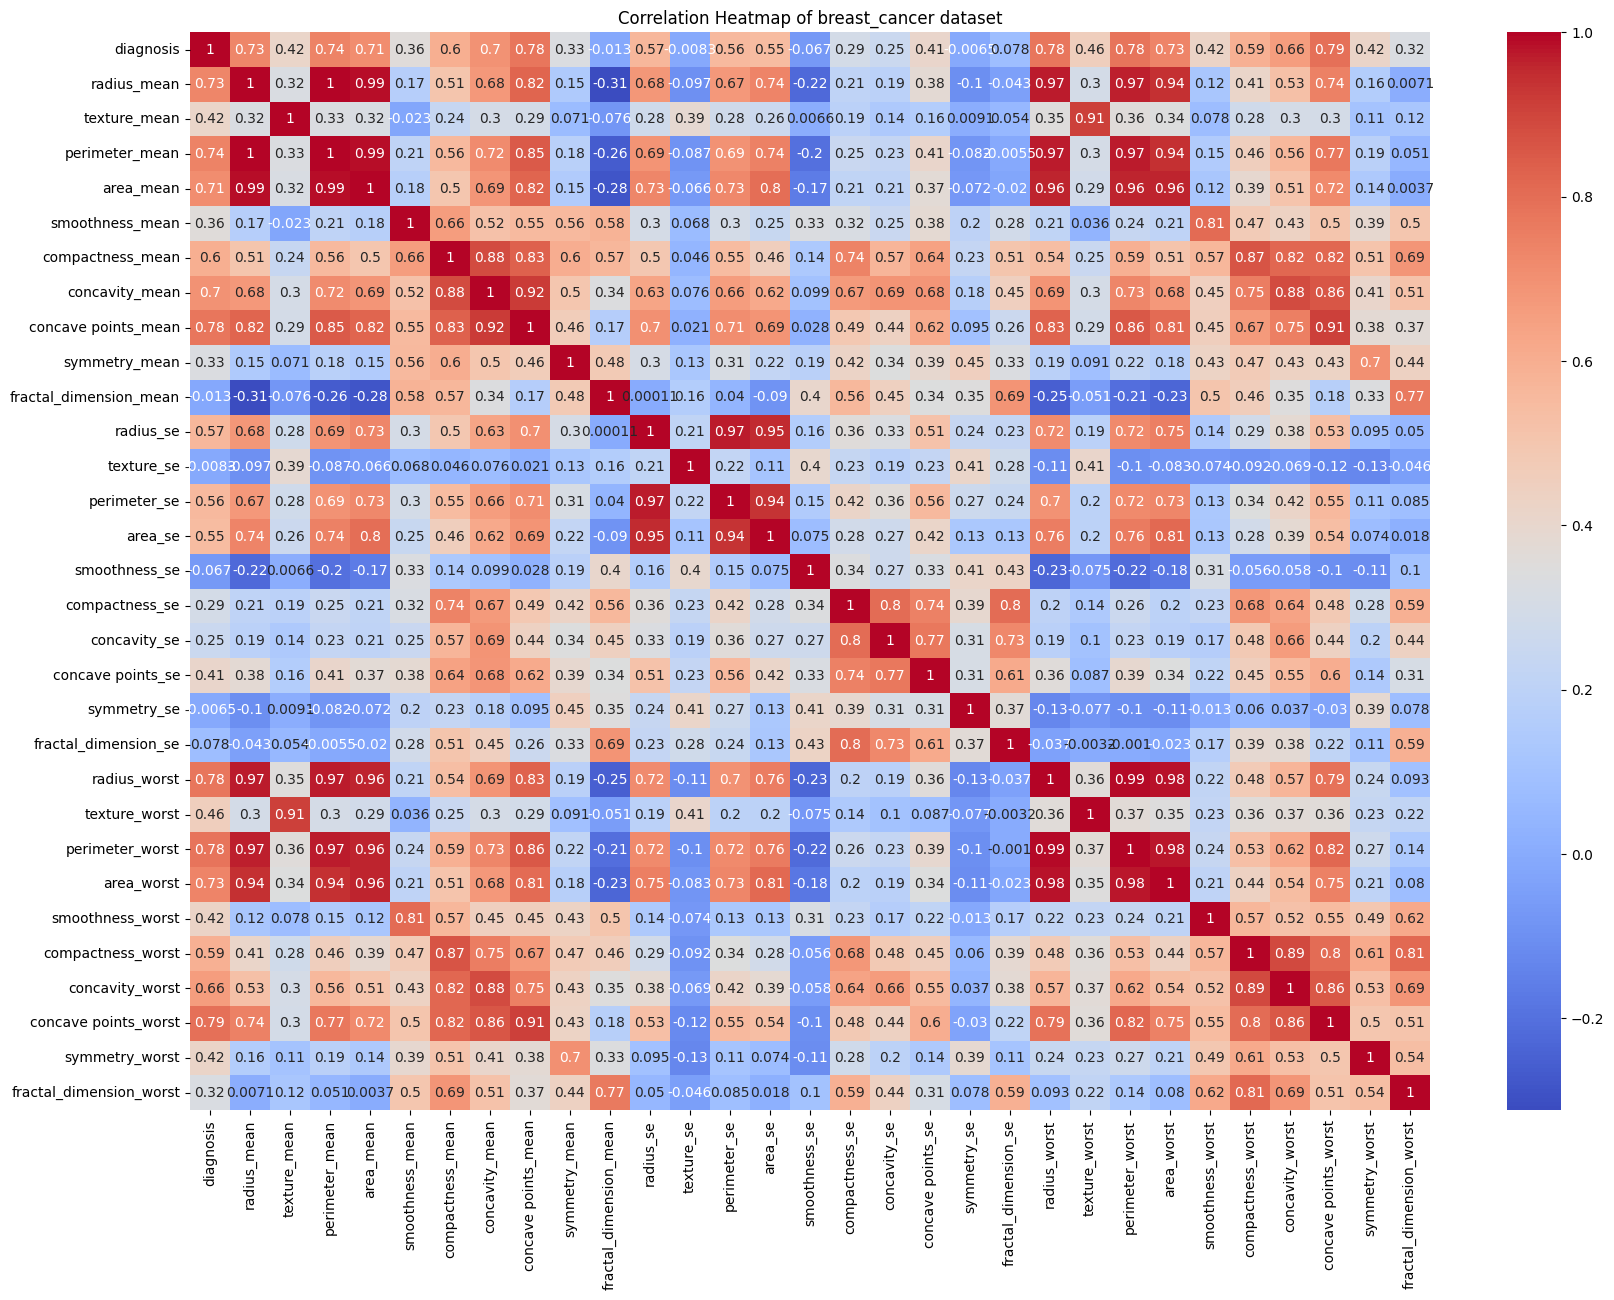

In [65]:
plt.figure(figsize=(20, 14))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of breast_cancer dataset')
plt.show()

Count the number of Malognet(M) as 1 or Benign(B) as 0

Text(0.5, 1.0, 'Diagnosis of Patients')

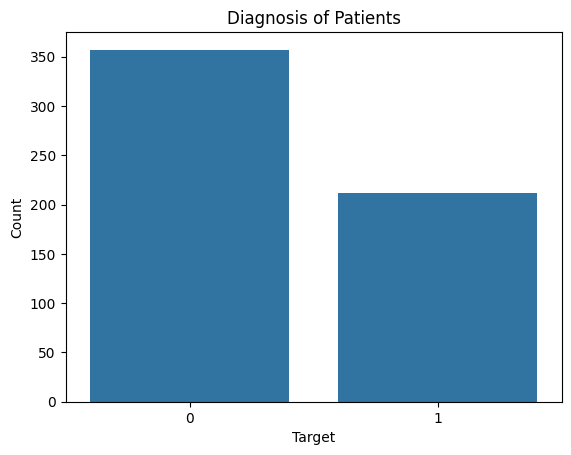

In [66]:
sns.countplot(x='diagnosis',data=data)
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Diagnosis of Patients")

#Histogram for each feature

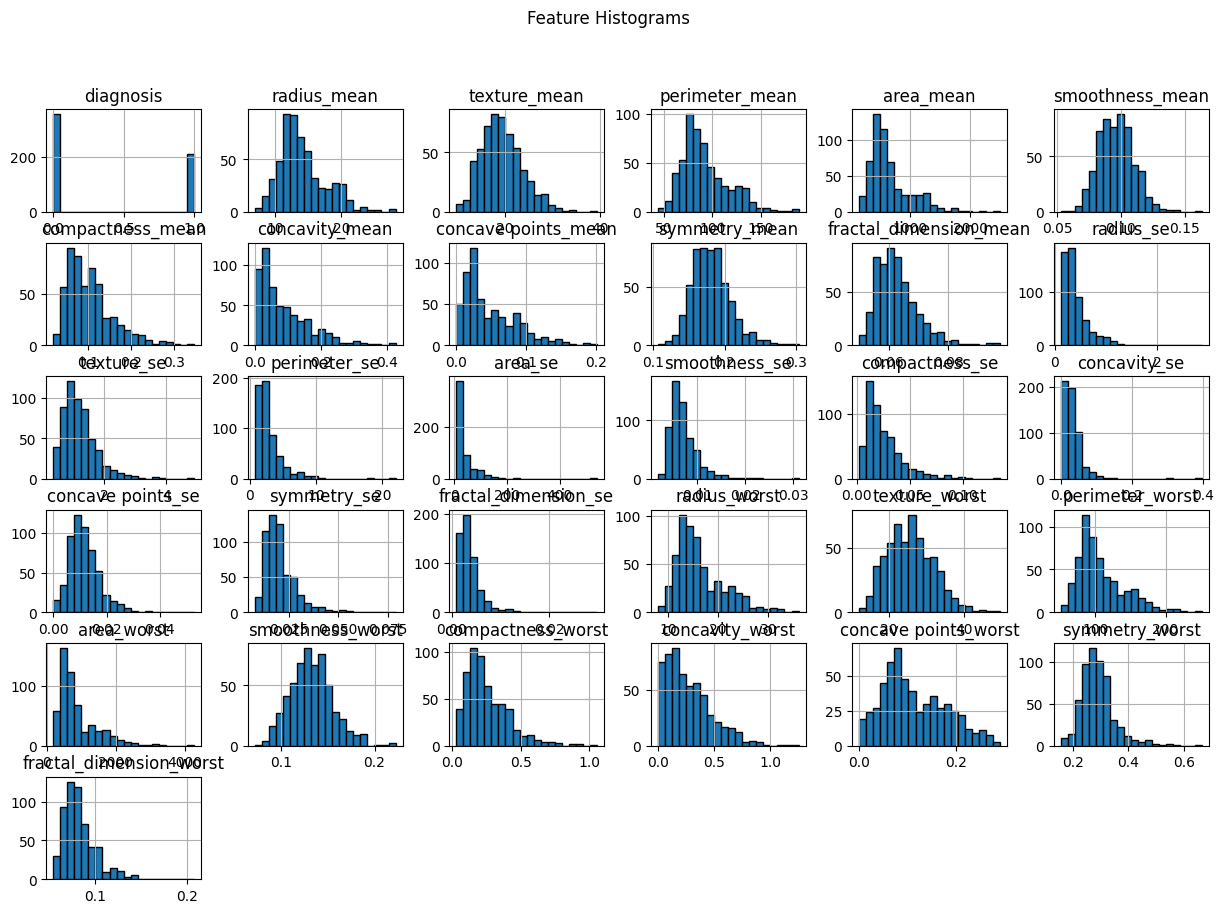

In [67]:
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Histograms')
plt.show()

Scatter Plot

<Axes: xlabel='radius_mean', ylabel='texture_mean'>

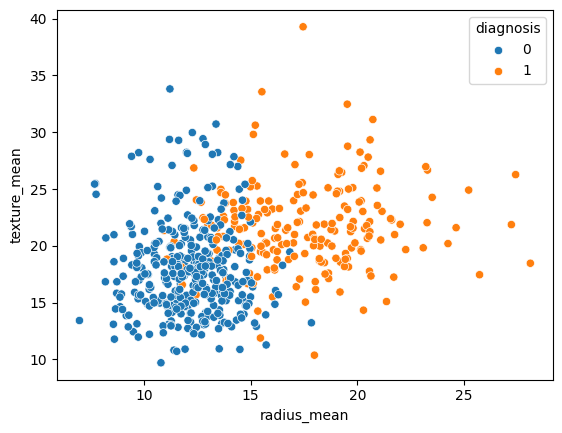

In [68]:
sns.scatterplot(x='radius_mean', y='texture_mean', data=data, hue='diagnosis')

<Axes: xlabel='area_worst'>

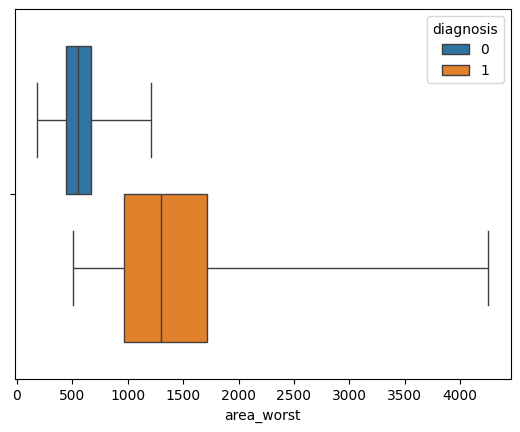

In [69]:
sns.boxplot(data=data, x="area_worst", hue='diagnosis', whis=(0, 100))
# Malognet(M) as 1 and Benign(B) as 0

Standardize features

In [70]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

Define features (X) and target (y)

In [71]:
X = scaled_data.drop('diagnosis', axis=1)
y = scaled_data['diagnosis']

Split into training and test sets (70/30)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Initialize models

In [73]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

Train and Store each model

In [74]:
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} model trained.")

Decision Tree model trained.
Random Forest model trained.
Gradient Boosting model trained.


Evaluation metrics Function

In [75]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name} Model Performance:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2 Score: {r2}")

    return mae, mse, rmse, r2

Evaluate All Models

In [76]:
for name, model in trained_models.items():
    evaluate_model(name, model, X_test, y_test)


Decision Tree Model Performance:
MAE: 0.14514275541006894
MSE: 0.3001964771343823
RMSE: 0.5479018864125057
R^2 Score: 0.6984126984126986

Random Forest Model Performance:
MAE: 0.1620760768745772
MSE: 0.144554610289443
RMSE: 0.38020338016572525
R^2 Score: 0.8547756613756613

Gradient Boosting Model Performance:
MAE: 0.15957259850598976
MSE: 0.13255885721857444
RMSE: 0.36408633209525243
R^2 Score: 0.8668269913369099


#Hyperparameter Tuning

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [78]:
results = {}

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

    print(f"\n{name} Model Performance:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R^2 Score: {r2}")

# Evaluate all models and store results
for name, model in trained_models.items():
    evaluate_model(name, model, X_test, y_test)


Decision Tree Model Performance:
MAE: 0.14514275541006894
MSE: 0.3001964771343823
RMSE: 0.5479018864125057
R^2 Score: 0.6984126984126986

Random Forest Model Performance:
MAE: 0.1620760768745772
MSE: 0.144554610289443
RMSE: 0.38020338016572525
R^2 Score: 0.8547756613756613

Gradient Boosting Model Performance:
MAE: 0.15957259850598976
MSE: 0.13255885721857444
RMSE: 0.36408633209525243
R^2 Score: 0.8668269913369099


Convert results dictionary to a DataFrame

In [79]:
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE       MSE      RMSE  R2 Score
Decision Tree      0.145143  0.300196  0.547902  0.698413
Random Forest      0.162076  0.144555  0.380203  0.854776
Gradient Boosting  0.159573  0.132559  0.364086  0.866827


Bar Chart for each metrics

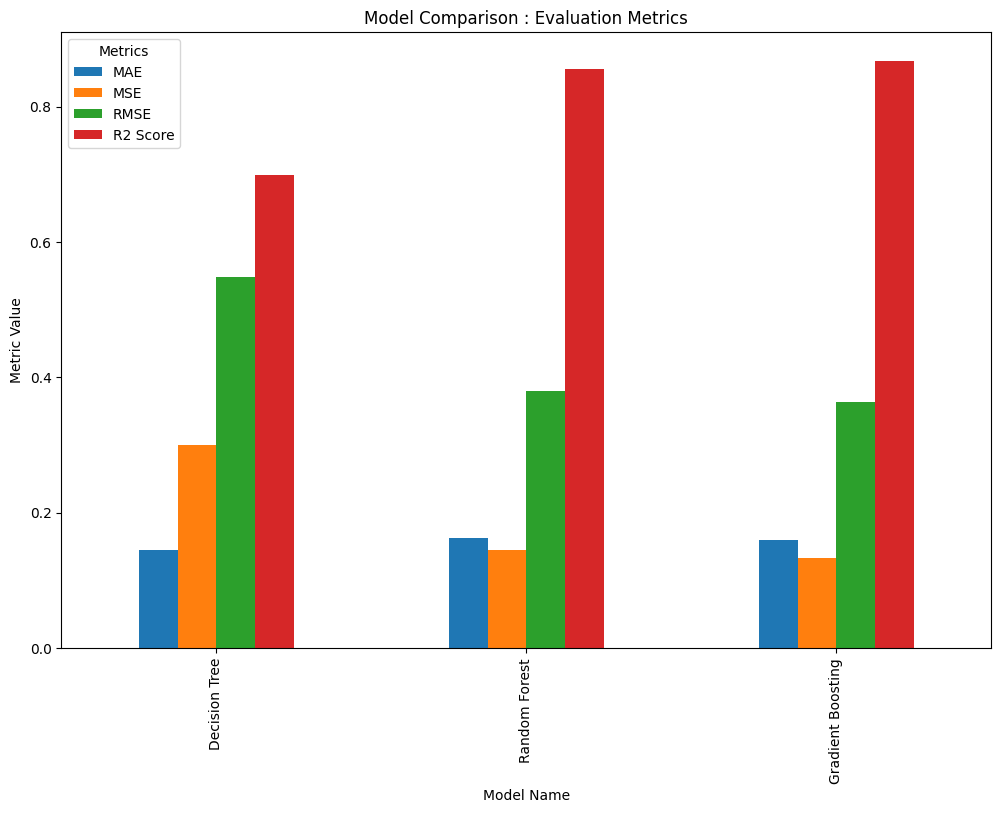

In [81]:
results_df.plot(kind="bar", figsize=(12, 8))
plt.title("Model Comparison : Evaluation Metrics")
plt.xlabel("Model Name")
plt.ylabel("Metric Value")
plt.legend(title="Metrics")
plt.show()

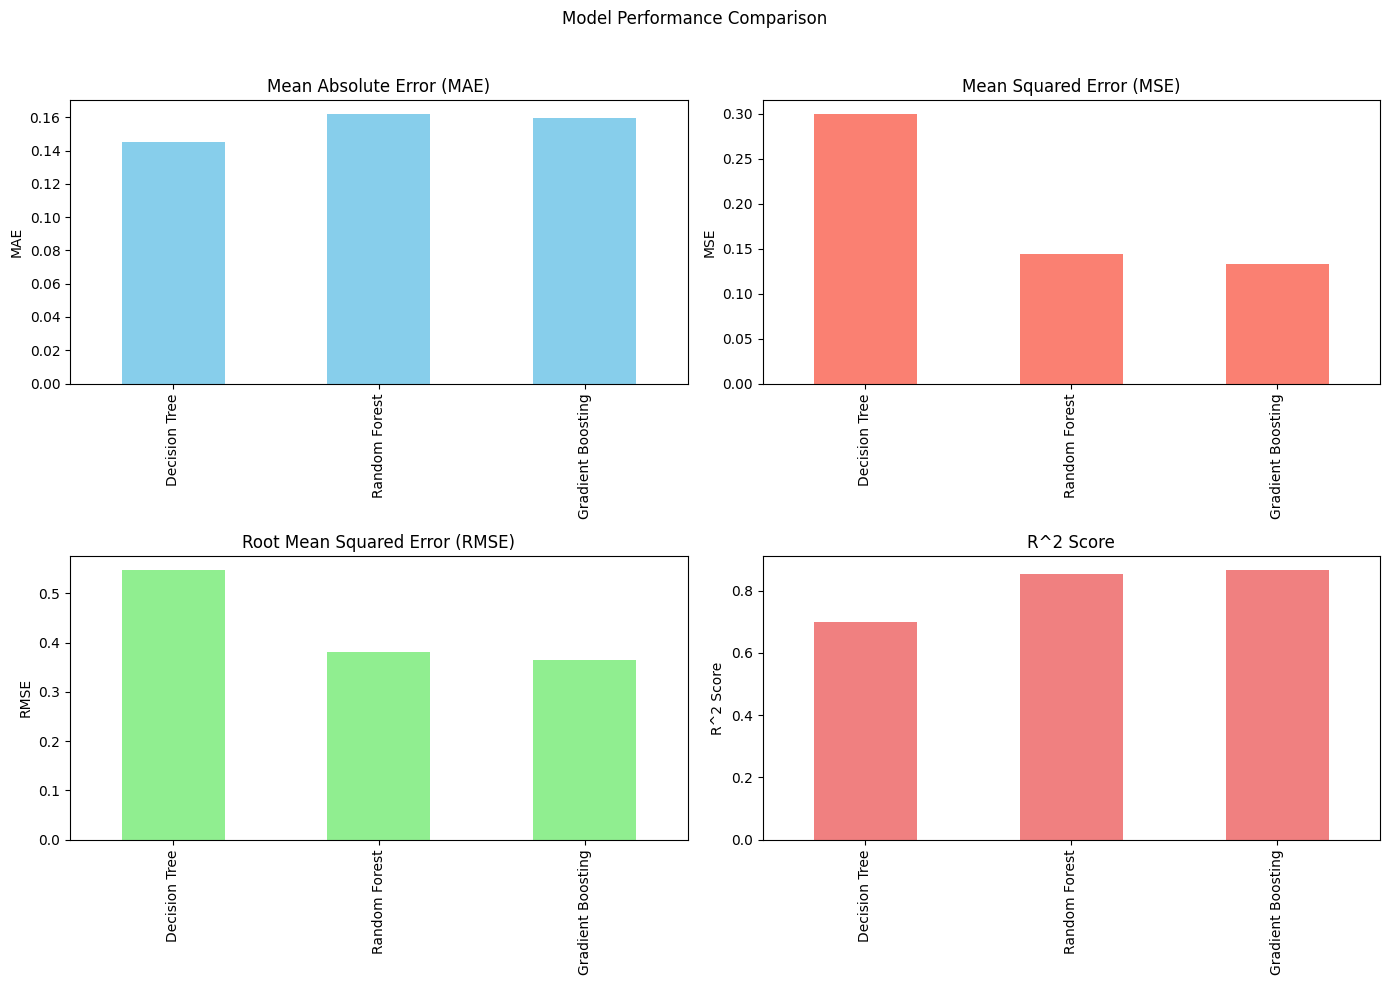

In [82]:
# Plot each metric in a separate subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Model Performance Comparison")

# Plot for MAE
results_df["MAE"].plot(kind="bar", ax=axes[0, 0], color="skyblue", title="Mean Absolute Error (MAE)")
axes[0, 0].set_ylabel("MAE")

# Plot for MSE
results_df["MSE"].plot(kind="bar", ax=axes[0, 1], color="salmon", title="Mean Squared Error (MSE)")
axes[0, 1].set_ylabel("MSE")

# Plot for RMSE
results_df["RMSE"].plot(kind="bar", ax=axes[1, 0], color="lightgreen", title="Root Mean Squared Error (RMSE)")
axes[1, 0].set_ylabel("RMSE")

# Plot for R^2 Score
results_df["R2 Score"].plot(kind="bar", ax=axes[1, 1], color="lightcoral", title="R^2 Score")
axes[1, 1].set_ylabel("R^2 Score")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()

Boxplot for each metric across different models

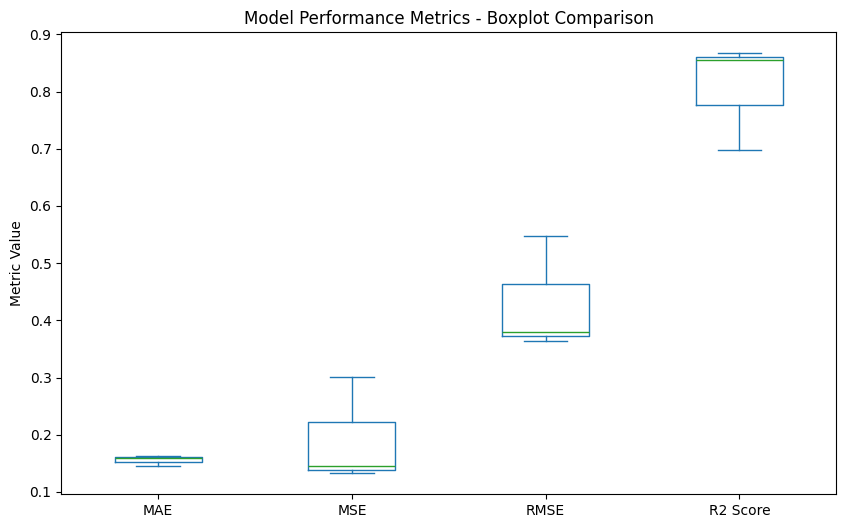

In [83]:
results_df.plot(kind="box", figsize=(10, 6))
plt.title("Model Performance Metrics - Boxplot Comparison")
plt.ylabel("Metric Value")
plt.show()

Findings

#Decision Tree

After Tuning: MAE, MSE, and RMSE values increased, indicating the model became less accurate.
𝑅2 Score decreased from 0.698 to 0.624, which signifies a reduction in the model's explanatory power.

Performance Impact: Tuning had a negative impact on the Decision Tree model's performance, suggesting that the hyperparameters selected may not have been optimal. This could also imply that the Decision Tree model is inherently sensitive to changes in parameters, possibly due to overfitting or underfitting issues.

#Random Forest

**After Tuning:** The MAE, MSE, and RMSE values slightly increased, suggesting a slight reduction in precision. However, the 𝑅2 Score dropped significantly from 0.855 to 0.805, which indicates a notable decline in the model’s explanatory power.

**Performance Impact:** Although Random Forest is generally more stable, this tuning appears to have somewhat reduced performance. This could be due to parameters that limited the model’s complexity, resulting in an overly generalized model.

#Gradient Boosting

**After Tuning:** All error metrics (MAE, MSE, and RMSE) worsened, while the 𝑅2 Score decreased from 0.867 to 0.776. This indicates a loss of predictive accuracy and fit.

**Performance Impact:** Like Random Forest, Gradient Boosting saw a decline in performance, suggesting that tuning parameters may have hindered the model’s ability to capture intricate patterns in the data.

#Summary of Findings

Overall, hyperparameter tuning in this case led to a decline in model performance across all three models. This outcome suggests that the selected hyperparameter combinations may have introduced inefficiencies, possibly by increasing bias or restricting the model’s complexity. In practice, this emphasizes the importance of:

1. Conducting cross-validation during tuning to mitigate overfitting or underfitting.
2. Experimenting with different ranges and combinations of hyperparameters.

***This analysis shows that tuning does not always yield improved performance, and the impact can vary significantly across models.***